In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
class_labels = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

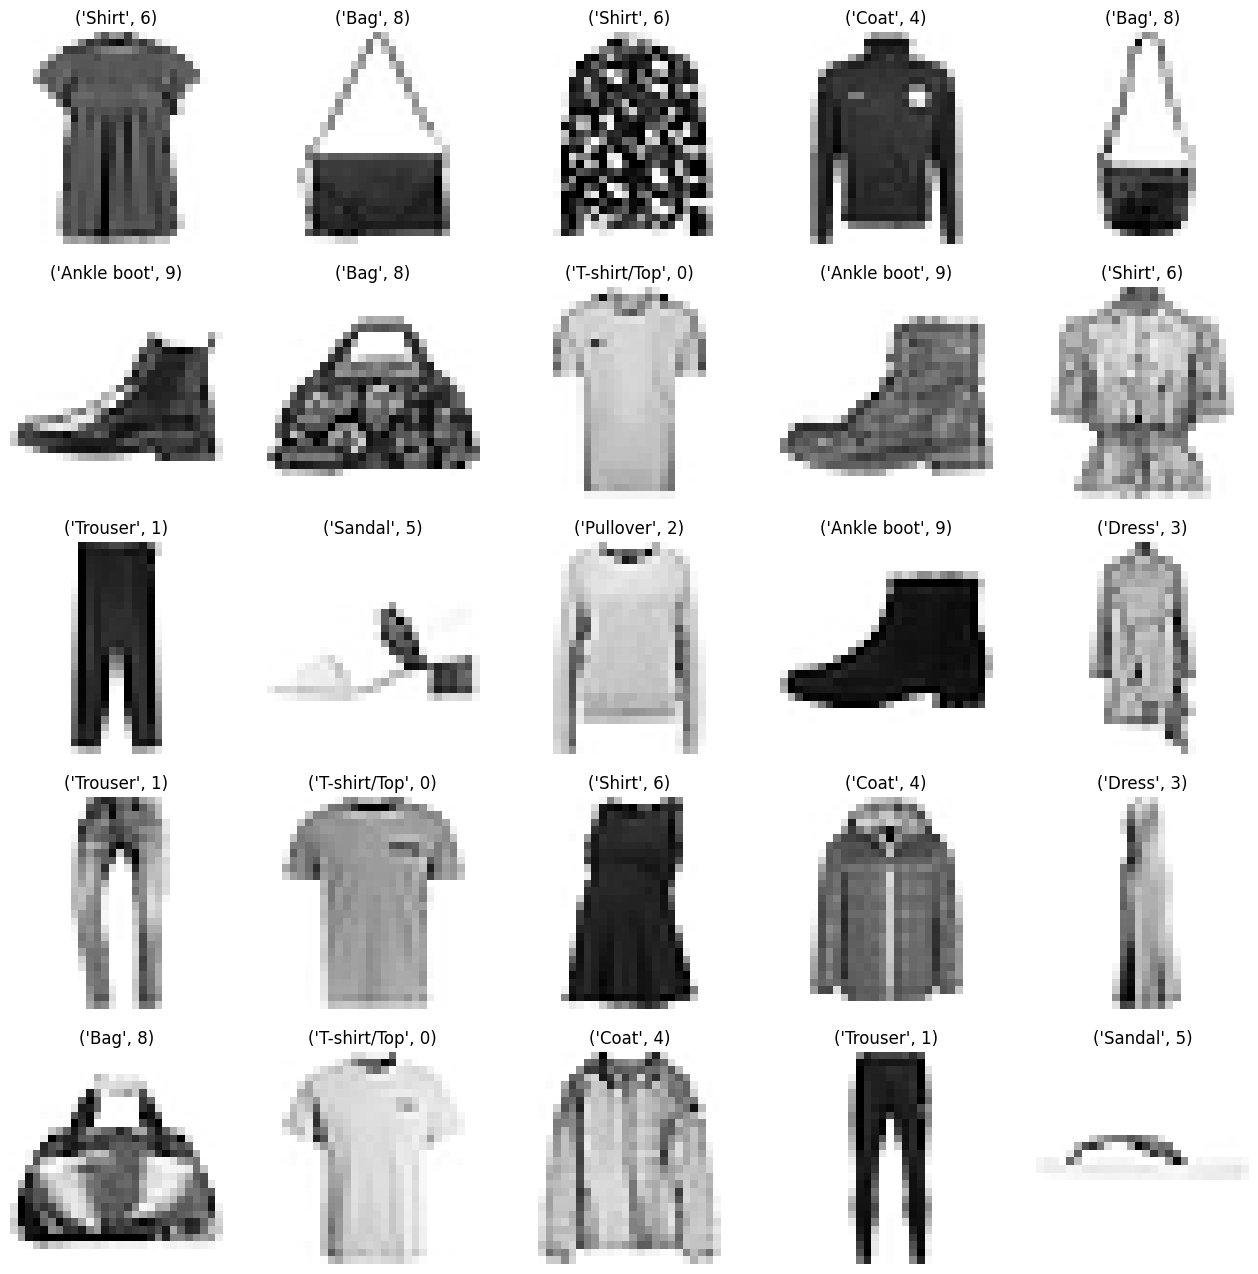

In [7]:
plt.figure(figsize=(16,16))

j=1

for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j); j+=1
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis("off")
    plt.title((class_labels[y_train[i]], y_train[i]))

In [8]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2020)

In [12]:
X_train.shape

(48000, 28, 28, 1)

In [13]:
X_val.shape

(12000, 28, 28, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
    Input(shape=[28, 28, 1]),
    Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding="valid", activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation="relu"),
    Dense(units=10, activation="softmax"),
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [17]:
model.fit(X_train, y_train, epochs=15, batch_size=512, verbose=1, validation_data=(X_val, y_val))

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7028 - loss: 0.9368 - val_accuracy: 0.8482 - val_loss: 0.4288
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8615 - loss: 0.3959 - val_accuracy: 0.8790 - val_loss: 0.3574
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8803 - loss: 0.3376 - val_accuracy: 0.8808 - val_loss: 0.3377
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.8913 - loss: 0.3089 - val_accuracy: 0.8882 - val_loss: 0.3199
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9005 - loss: 0.2790 - val_accuracy: 0.8947 - val_loss: 0.3000
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9053 - loss: 0.2650 - val_accuracy: 0.8965 - val_loss: 0.2911
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9121 - loss: 0.2464 - val_accuracy: 0.9022 - val_loss: 0.2805
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9151 - loss: 0.2332 - val_accuracy: 0.8982 - v

In [18]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
model.predict(X_test).round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.09, 0.05, 0.  ]], dtype=float32)